Importing Libraries and Data

In [1]:
#for data manipulation

import pandas as pd
import numpy as np

#for data visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

#for preprocessing and ML algorithm

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

#for tunning and evalution

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

#for ignoring warnings

import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [257]:
#importing data from computer

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [258]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [259]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [260]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [262]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [263]:
train.columns[3]

'Name'

In [264]:
train.columns[3:6]

Index(['Name', 'Sex', 'Age'], dtype='object')

In [265]:
train[5:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [266]:
train.shape

(891, 12)

In [267]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [268]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [271]:
y_train = train['Survived'].values
passId = test['PassengerId']

In [15]:
data = pd.concat((train,test))
print("Data size is {}".format(data.shape))

Data size is (1309, 12)


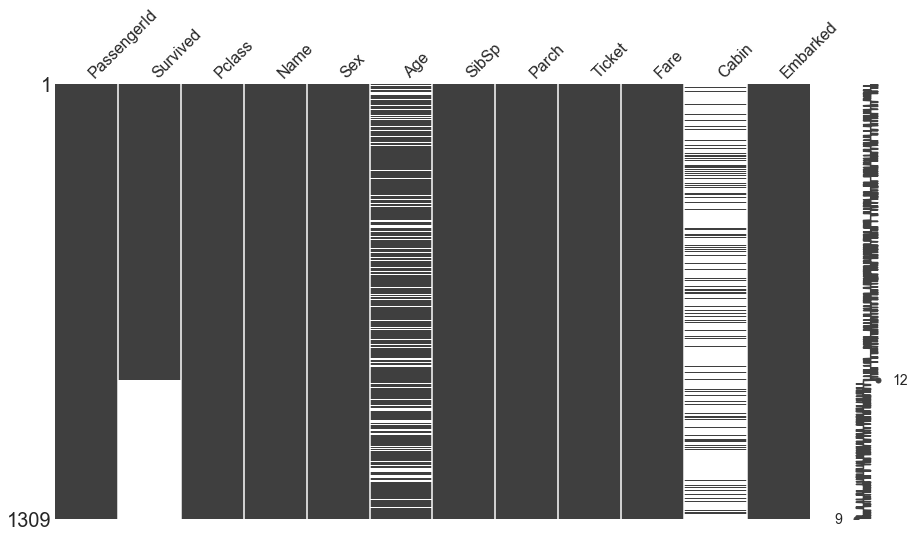

In [16]:
missingno.matrix(data,figsize=(15,8))

In [17]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
data.Age.isnull().any()

True

In [19]:
data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [20]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

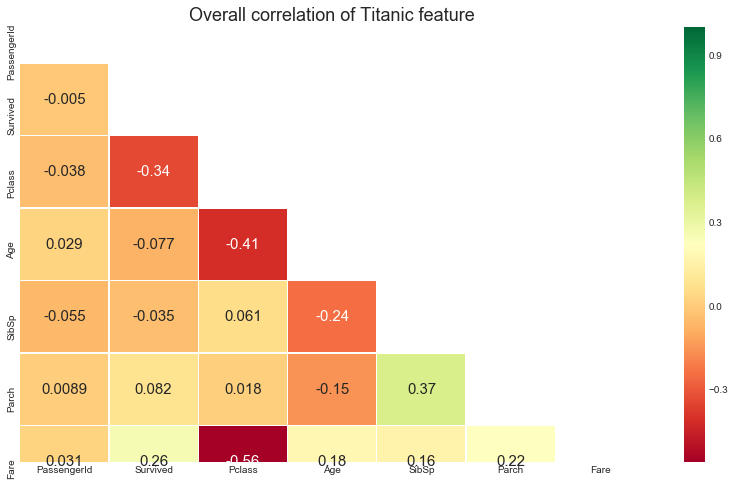

In [21]:
#Correlation
corr = data.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(14,8))
plt.title('Overall correlation of Titanic feature',fontsize = 18)
sns.heatmap(corr,mask = mask,annot = True,cmap='RdYlGn',linewidths = 0.3,annot_kws={'size':15})
plt.show

0    549
1    342
Name: Survived, dtype: int64


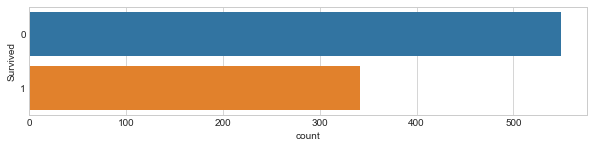

In [22]:
fig = plt.figure(figsize = (10,2))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

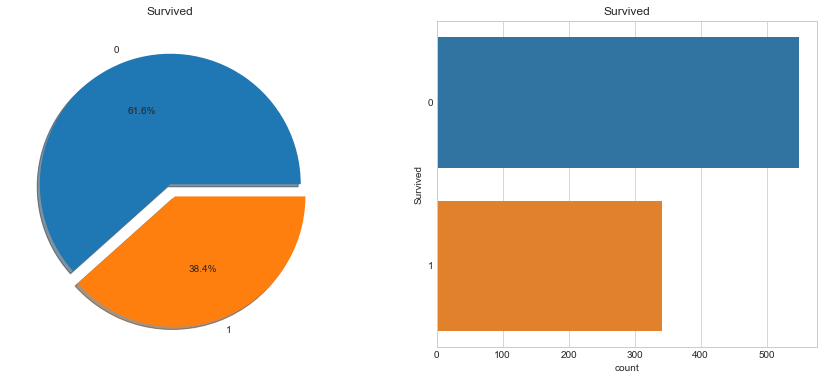

In [23]:
f,ax = plt.subplots(1,2,figsize = (15,6))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(y='Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

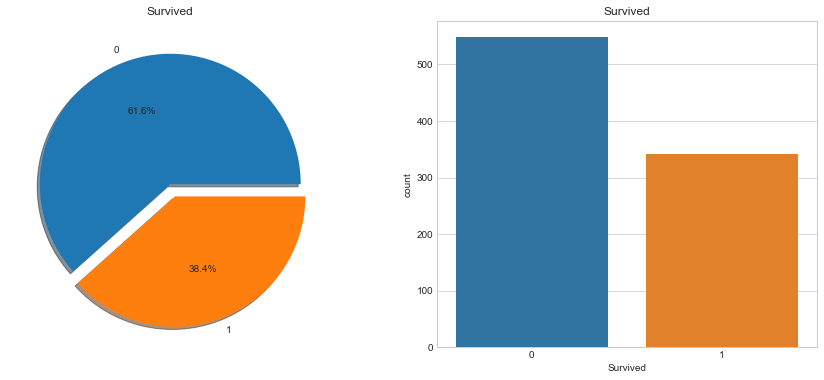

In [24]:
def piecount(a):
    f,ax = plt.subplots(1,2,figsize=(15,6))
    train[a].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax = ax[0],shadow=True)
    ax[0].set_title(a)
    ax[0].set_ylabel('')
    sns.countplot(a,data=train,ax=ax[1])
    ax[1].set_title(a)
    plt.show()
piecount('Survived')

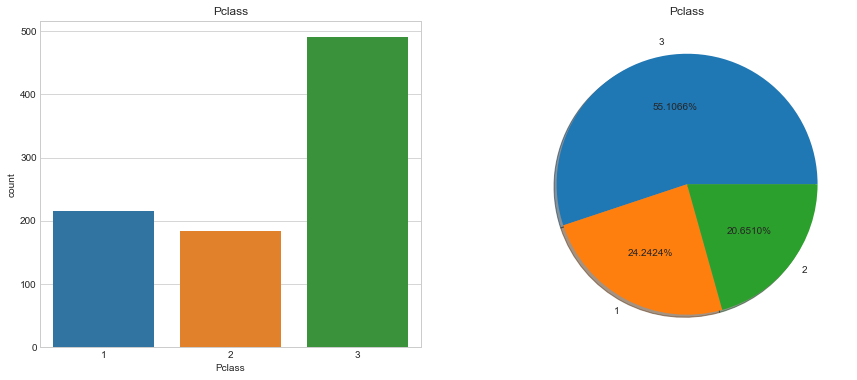

In [25]:
def piecount3(a):
    f,ax = plt.subplots(1,2,figsize=(15,6))
    train[a].value_counts().plot.pie(explode=[0,0.0,0],autopct='%0.4f%%',ax=ax[1],shadow=True)
    ax[1].set_title(a)
    ax[1].set_ylabel('')
    sns.countplot(a,data=train,ax = ax[0])
    ax[0].set_title(a)
    plt.show()
piecount3("Pclass")

In [26]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [27]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


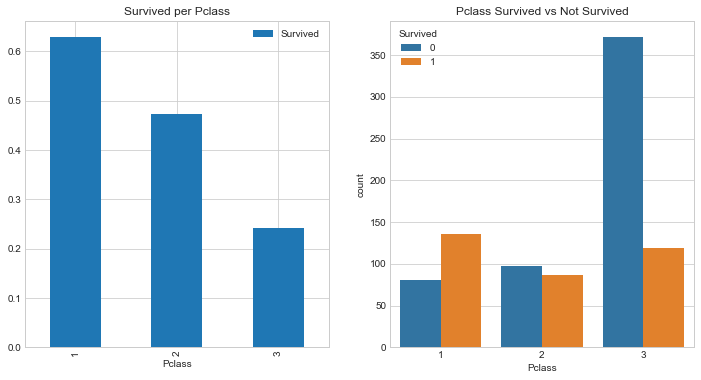

In [28]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pclass')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived')
plt.show()


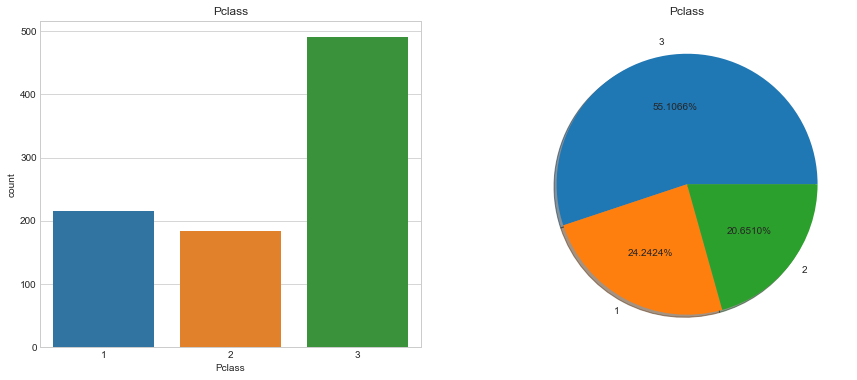

In [29]:
piecount3("Pclass")

In [30]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [31]:
data.Name.value_counts()

Kelly, Mr. James                                  2
Connolly, Miss. Kate                              2
Lester, Mr. James                                 1
Troupiansky, Mr. Moses Aaron                      1
Goldsmith, Mrs. Frank John (Emily Alice Brown)    1
                                                 ..
Cacic, Mr. Jego Grga                              1
Wenzel, Mr. Linhart                               1
Andersson, Master. Sigvard Harald Elias           1
Flegenheim, Mrs. Alfred (Antoinette)              1
Snyder, Mr. John Pillsbury                        1
Name: Name, Length: 1307, dtype: int64

In [32]:
temp = data.copy()
temp['Initial']=0
for i in temp:
    temp['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [33]:
pd.crosstab(temp.Initial,temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


In [34]:
def survpct(a):
    return temp.groupby(a).Survived.mean()
survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [35]:
pd.crosstab(temp.Initial,temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [36]:
temp['LastName']=0
for i in temp:
    temp['LastName']=data.Name.str.extract('([A-Za-z]+)')

In [37]:
pd.crosstab(temp.LastName,temp.Survived).T.style.background_gradient(cmap='summer_r')

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow


In [38]:
temp.loc[(temp['Initial']=='Dona')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


In [39]:
temp.loc[(temp['Initial']=='Dona'),'Initial']='Mrs'

In [40]:
pd.crosstab(temp.Initial,temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


In [41]:
temp['NumName']=0

for i in temp:
    temp['NumName'] = temp['LastName'].factorize()[0]

In [42]:
pd.crosstab(temp.NumName,temp.Survived).T.style.background_gradient(cmap='summer_r')

NumName,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439


In [43]:
temp.loc[(temp['LastName']=='Ali')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
210,211,0.0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S,Mr,Ali,182
784,785,0.0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S,Mr,Ali,182


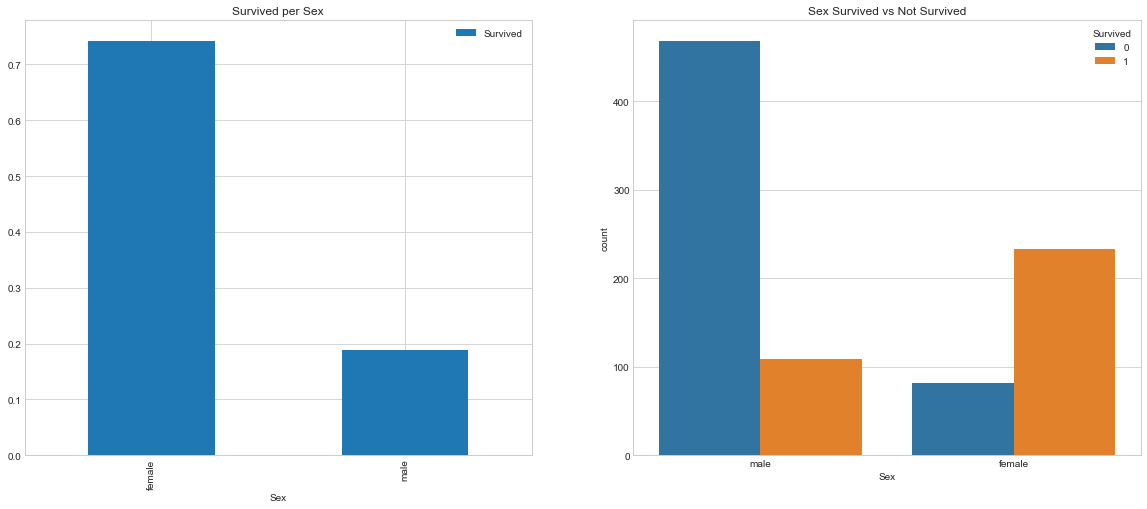

In [44]:
def bag(a,b,c,d):
    f,ax = plt.subplots(1,2,figsize=(20,8))
    train[[a,b]].groupby([a]).mean().plot.bar(ax=ax[0])
    ax[0].set_title(c)
    sns.countplot(a,hue=b,data=train,ax=ax[1])
    ax[1].set_title(d)
    plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

In [45]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [46]:
print('Oldest Passenger was ',data['Age'].max(),'Years')
print('Youngest Passenger was ',data['Age'].min(),'Years')
print('Average age of Passengers on ship was ',int(data['Age'].mean()),'Years')

Oldest Passenger was  80.0 Years
Youngest Passenger was  0.17 Years
Average age of Passengers on ship was  29 Years


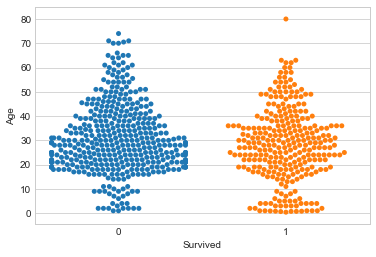

In [47]:
sns.swarmplot(x=train['Survived'],y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

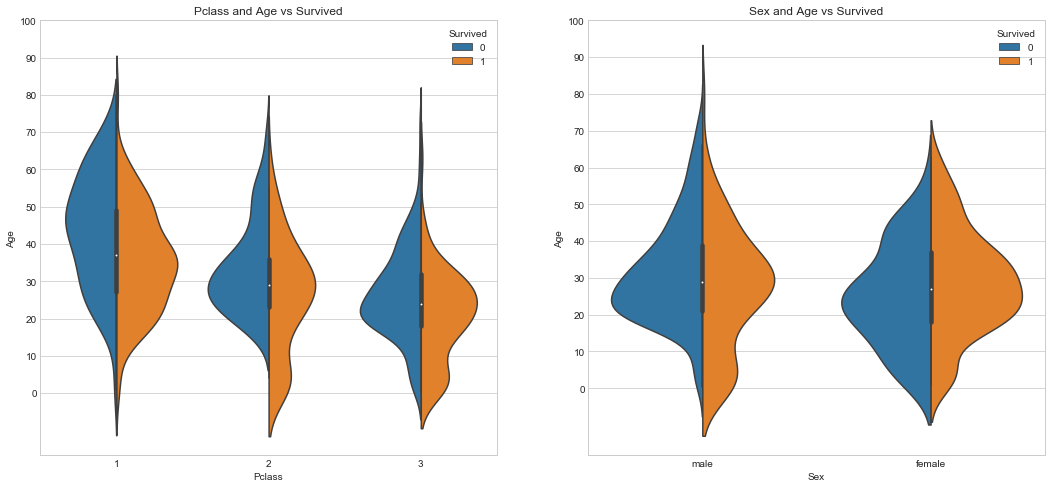

In [48]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue="Survived",data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived",data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [49]:
temp.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         37.005848
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [50]:
# Assigning NaN Age items with mean value of Initials
temp=temp.reset_index(drop=True)

temp['Age']=temp.groupby('Initial')['Age'].apply(lambda x:x.fillna(x.mean()))

temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,37.005848,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


In [51]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'],[4,4,2,5,6,3,1],inplace=True)

In [52]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [53]:
temp['Age_Range']=pd.qcut(temp['Age'],10)

In [54]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [55]:
temp['Agroup']=0

temp.loc[temp['Age']<1.0,'Agroup']=1
temp.loc[(temp['Age']>=1.0)&(temp['Age']<=3.0),'Agroup']= 2
temp.loc[(temp['Age']>3.0)&(temp['Age']<11.0),'Agroup']= 7
temp.loc[(temp['Age']>=11.0)&(temp['Age']<15.0),'Agroup']= 13
temp.loc[(temp['Age']>=15.0)&(temp['Age']<18.0),'Agroup']= 16
temp.loc[(temp['Age']>=18.0)&(temp['Age']<= 20.0),'Agroup']= 18
temp.loc[(temp['Age']> 20.0)&(temp['Age']<=22.0),'Agroup']= 21
temp.loc[(temp['Age']>22.0)&(temp['Age']<=26.0),'Agroup']= 24
temp.loc[(temp['Age']>26.0)&(temp['Age']<=30.0),'Agroup']= 28
temp.loc[(temp['Age']>30.0)&(temp['Age']<=32.0),'Agroup']= 31
temp.loc[(temp['Age']>32.0)&(temp['Age']<=34.0),'Agroup']= 33
temp.loc[(temp['Age']>34.0)&(temp['Age']<=38.0),'Agroup']= 36
temp.loc[(temp['Age']>38.0)&(temp['Age']<=52.0),'Agroup']= 45
temp.loc[(temp['Age']>52.0)&(temp['Age']<=75.0),'Agroup']= 60
temp.loc[temp['Age']>75.0,'Agroup']= 78

In [56]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36


In [57]:
survpct('Age')

Age
0.17     NaN
0.33     NaN
0.42     1.0
0.67     1.0
0.75     1.0
        ... 
70.50    0.0
71.00    0.0
74.00    0.0
76.00    NaN
80.00    1.0
Name: Survived, Length: 103, dtype: float64

In [58]:
temp.loc[(temp['Sex']=='male'),'Sex']=1
temp.loc[(temp['Sex']=='female'),'Sex']=2
temp.loc[(temp['Age']<1),'Sex']=3

In [59]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36


In [60]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [61]:
temp['Alone']=0
temp.loc[(temp['SibSp']==0)&(temp['Parch']==0),'Alone']=1

In [62]:
temp['Family']=0
for i in temp:
    temp['Family']=temp['Parch']+temp['SibSp']+1

In [63]:
temp.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,0,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,0,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,0,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1,1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,2,Moran,5,"(30.0, 32.252]",33,1,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,2,McCarthy,6,"(48.0, 80.0]",60,1,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,4,Palsson,7,"(0.169, 16.0]",2,0,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,5,Johnson,8,"(26.0, 30.0]",28,0,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,5,Nasser,9,"(0.169, 16.0]",13,0,2


In [64]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

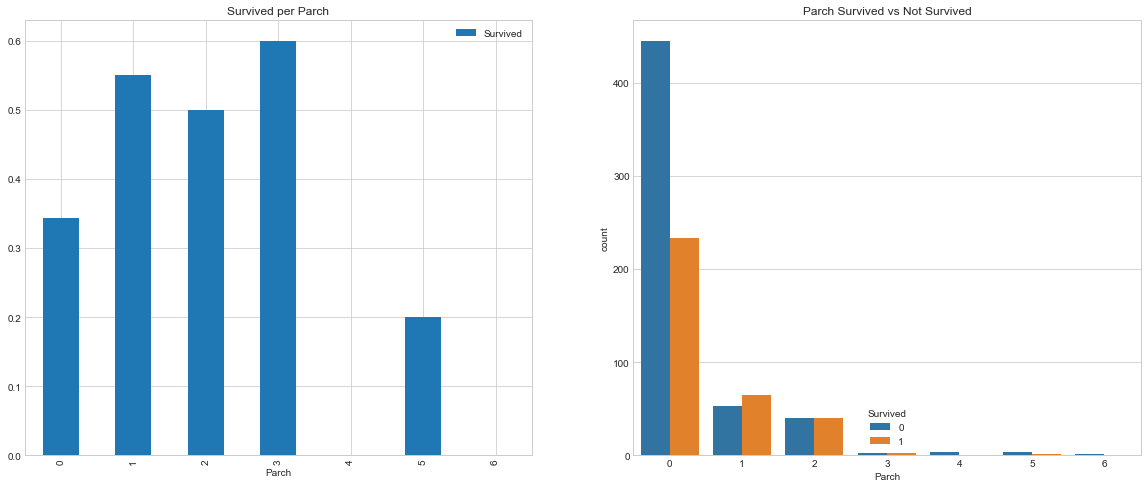

In [65]:
bag('Parch','Survived','Survived per Parch','Parch Survived vs Not Survived')

In [66]:
pd.crosstab([temp.Family,temp.Survived],temp.Pclass,margins=True).style.background_gradient(cmap='summer_r')

In [67]:
temp.Ticket.head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [68]:
temp.Ticket.isnull().any()

False

In [69]:
temp['Initick']=0
for s in data:
    temp['Initick']=temp.Ticket.str.extract('^([A-Za-z]+)')
temp = temp.reset_index(drop=True) #to avoid ValueError: cannot reindex from a duplicate axis
temp.loc[(temp.Initick.isnull()),'Initick']=temp['Ticket']
    

In [70]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,0,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,0,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,0,2,113803
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1,1,373450


In [71]:
temp['NumTicket']=0
for i in temp:
    temp['NumTicket']=temp['Initick'].factorize()[0]

In [72]:
temp.head(n=15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,...,S,2,Braund,0,"(21.0, 23.0]",21,0,2,A,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,...,C,5,Cumings,1,"(33.0, 39.0]",36,0,2,PC,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,...,S,4,Heikkinen,2,"(23.0, 26.0]",24,1,1,STON,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,...,S,5,Futrelle,3,"(33.0, 39.0]",36,0,2,113803,3
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,...,S,2,Allen,4,"(33.0, 39.0]",36,1,1,373450,4
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,...,Q,2,Moran,5,"(30.0, 32.252]",33,1,1,330877,5
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,...,S,2,McCarthy,6,"(48.0, 80.0]",60,1,1,17463,6
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,...,S,4,Palsson,7,"(0.169, 16.0]",2,0,5,349909,7
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,...,S,5,Johnson,8,"(26.0, 30.0]",28,0,3,347742,8
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,...,C,5,Nasser,9,"(0.169, 16.0]",13,0,2,237736,9


In [73]:
def groupmean(a,b):
    return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

groupmean('NumTicket','Survived')

,Survived
NumTicket,
0,0.068966
1,0.650000
2,0.444444
3,0.500000
4,0.000000
5,0.000000
6,0.000000
7,0.000000
8,1.000000


In [74]:
print('Highest Fare was:',temp['Fare'].max())
print('Lowest Fare was:',temp['Fare'].min())
print('Average Fare was:',temp['Fare'].mean())


Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


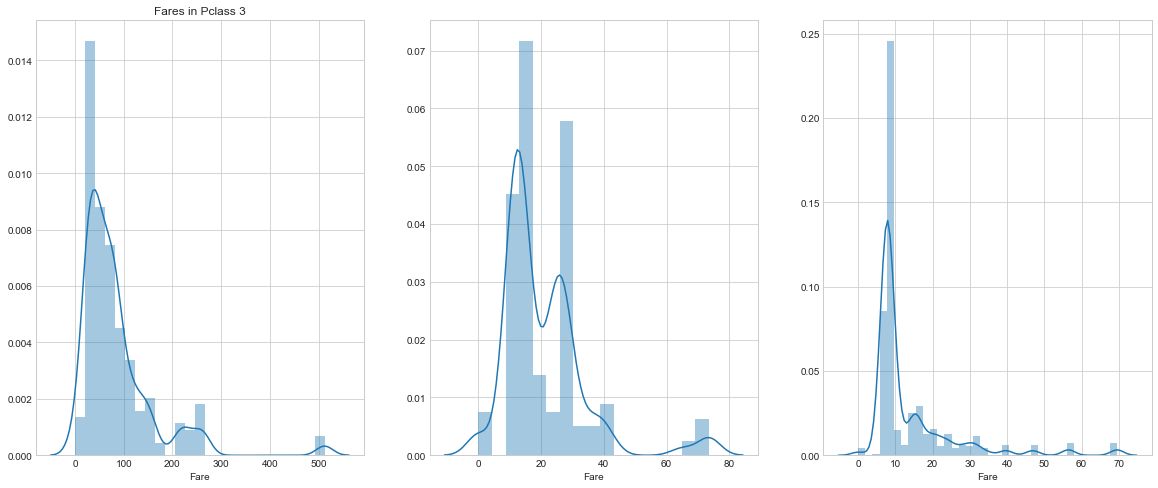

In [75]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[0].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[0].set_title('Fares in Pclass 3')
plt.show()

In [76]:
temp['Fare_Range']=pd.qcut(train['Fare'],10)
groupmean('Fare_Range','Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.928717
"(7.55, 7.854]",7.768490
"(7.854, 8.05]",7.963669
"(8.05, 10.5]",9.521367
"(10.5, 14.454]",12.940231
"(14.454, 21.679]",17.386408
"(21.679, 27.0]",25.487501
"(27.0, 39.688]",32.282186
"(39.688, 77.958]",59.444572


In [77]:
temp['Fgroup']=0

temp.loc[temp['Fare']<=0,'Fgroup']=0
temp.loc[(temp['Fare']>0)&(temp['Fare']<=7.125),'Fgroup']=1
temp.loc[(temp['Fare']>7.125)&(temp['Fare']<=7.9),'Fgroup']= 2
temp.loc[(temp['Fare']>7.9)&(temp['Fare']<=8.03),'Fgroup']= 3
temp.loc[(temp['Fare']>8.03)&(temp['Fare']<10.5),'Fgroup']= 4
temp.loc[(temp['Fare']>=10.5)&(temp['Fare']<23.0),'Fgroup']= 5
temp.loc[(temp['Fare']>=23.0)&(temp['Fare']<=27.8),'Fgroup']= 6
temp.loc[(temp['Fare']>27.8)&(temp['Fare']<=51.0),'Fgroup']= 7
temp.loc[(temp['Fare']>51.0)&(temp['Fare']<=73.5),'Fgroup']= 8
temp.loc[temp['Fare']>73.5,'Fgroup']= 9

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,Braund,0,"(21.0, 23.0]",21,0,2,A,0,"(-0.001, 7.55]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,...,Cumings,1,"(33.0, 39.0]",36,0,2,PC,1,"(39.688, 77.958]",8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,...,Heikkinen,2,"(23.0, 26.0]",24,1,1,STON,2,"(7.854, 8.05]",3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,...,Futrelle,3,"(33.0, 39.0]",36,0,2,113803,3,"(39.688, 77.958]",8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,Allen,4,"(33.0, 39.0]",36,1,1,373450,4,"(7.854, 8.05]",4


In [78]:
temp.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F33                4
C78                4
                  ..
A9                 1
E77                1
D47                1
B50                1
C91                1
Name: Cabin, Length: 186, dtype: int64

In [79]:
temp.Cabin.isnull().sum()

1014

In [80]:
temp['Inicab']=0
for i in temp:
    temp['Inicab']=temp.Cabin.str.extract('^([A-Za-z]+)')
    temp.loc[((temp.Cabin.isnull())&(temp.Pclass.values==1)),'Inicab']='X'
    temp.loc[((temp.Cabin.isnull())&(temp.Pclass.values==2)),'Inicab']='Y'
    temp.loc[((temp.Cabin.isnull())&(temp.Pclass.values==3)),'Inicab']='Z'

temp.head(n=12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,...,0,"(21.0, 23.0]",21,0,2,A,0,"(-0.001, 7.55]",2,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,...,1,"(33.0, 39.0]",36,0,2,PC,1,"(39.688, 77.958]",8,C
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,...,2,"(23.0, 26.0]",24,1,1,STON,2,"(7.854, 8.05]",3,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,...,3,"(33.0, 39.0]",36,0,2,113803,3,"(39.688, 77.958]",8,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,...,4,"(33.0, 39.0]",36,1,1,373450,4,"(7.854, 8.05]",4,Z
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,...,5,"(30.0, 32.252]",33,1,1,330877,5,"(8.05, 10.5]",4,Z
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,...,6,"(48.0, 80.0]",60,1,1,17463,6,"(39.688, 77.958]",8,E
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,...,7,"(0.169, 16.0]",2,0,5,349909,7,"(14.454, 21.679]",5,Z
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,...,8,"(26.0, 30.0]",28,0,3,347742,8,"(10.5, 14.454]",5,Z
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,...,9,"(0.169, 16.0]",13,0,2,237736,9,"(27.0, 39.688]",7,Y


In [81]:
for i in temp:
    temp['Inicab']=temp['Inicab'].factorize()[0]

temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,...,11,"(48.0, 80.0]",60,1,1,113783,11,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,...,12,"(16.0, 21.0]",18,1,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,...,13,"(33.0, 39.0]",45,0,7,347082,12,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,...,14,"(0.169, 16.0]",13,1,1,350406,13,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,...,15,"(48.0, 80.0]",60,1,1,248706,14,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,...,16,"(0.169, 16.0]",2,0,6,382652,15,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,...,17,"(30.0, 32.252]",33,1,1,244373,16,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,...,18,"(30.0, 32.252]",31,0,2,345763,17,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,...,19,"(33.0, 39.0]",36,1,1,2649,18,"(-0.001, 7.55]",2,0


In [82]:
pd.crosstab([temp.Embarked,temp.Pclass],[temp.Sex,temp.Survived],margins=True).style.background_gradient(cmap='summer_r')

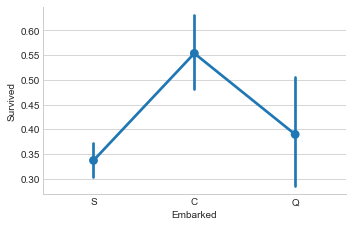

In [83]:
sns.factorplot('Embarked','Survived',data=temp)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

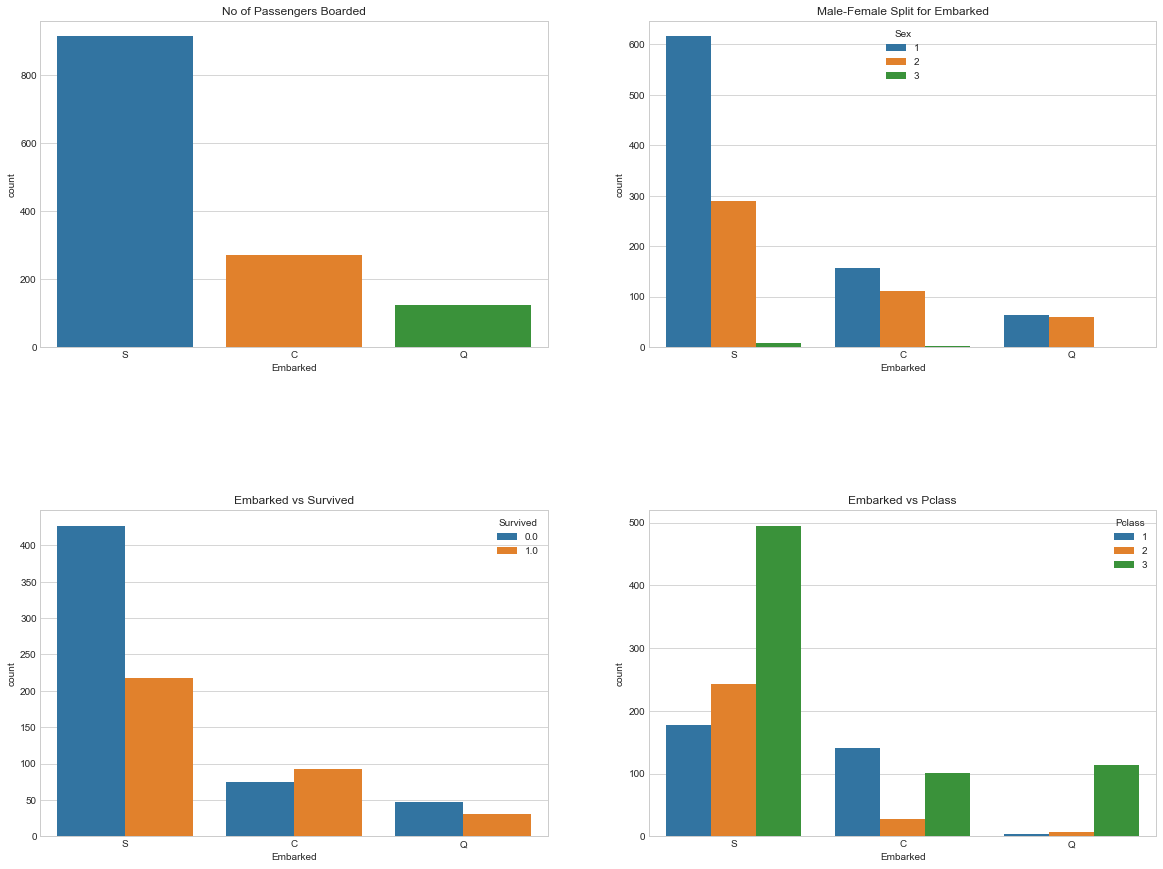

In [84]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=temp,ax=ax[0,0])
ax[0,0].set_title('No of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=temp,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=temp,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=temp,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [85]:
temp.Embarked.isnull().sum()

2

In [86]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1,1,113572,51,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1,1,113572,51,"(77.958, 512.329]",9,8


In [87]:
temp.loc[(temp.Ticket=='113572')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,...,58,"(33.0, 39.0]",36,1,1,113572,51,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,...,616,"(48.0, 80.0]",60,1,1,113572,51,"(77.958, 512.329]",9,8


In [88]:
temp.sort_values(['Ticket'],ascending=True)[55:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",1,65.000000,0,1,113509,61.9792,...,51,"(48.0, 80.0]",60,0,2,113509,46,"(39.688, 77.958]",8,8
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",1,32.252151,0,0,113510,35.0000,...,17,"(30.0, 32.252]",33,1,1,113510,232,"(27.0, 39.688]",7,1
252,253,0.0,1,"Stead, Mr. William Thomas",1,62.000000,0,0,113514,26.5500,...,217,"(48.0, 80.0]",60,1,1,113514,171,"(21.679, 27.0]",6,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.000000,0,0,113572,80.0000,...,616,"(48.0, 80.0]",60,1,1,113572,51,"(77.958, 512.329]",9,8
61,62,1.0,1,"Icard, Miss. Amelie",2,38.000000,0,0,113572,80.0000,...,58,"(33.0, 39.0]",36,1,1,113572,51,"(77.958, 512.329]",9,8
802,803,1.0,1,"Carter, Master. William Thornton II",1,11.000000,1,2,113760,120.0000,...,215,"(0.169, 16.0]",13,0,4,113760,253,"(77.958, 512.329]",9,8
390,391,1.0,1,"Carter, Mr. William Ernest",1,36.000000,1,2,113760,120.0000,...,215,"(33.0, 39.0]",36,0,4,113760,253,"(77.958, 512.329]",9,8
435,436,1.0,1,"Carter, Miss. Lucile Polk",2,14.000000,1,2,113760,120.0000,...,215,"(0.169, 16.0]",13,0,4,113760,253,"(77.958, 512.329]",9,8
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",2,36.000000,1,2,113760,120.0000,...,215,"(33.0, 39.0]",36,0,4,113760,253,"(77.958, 512.329]",9,8
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",1,32.252151,0,0,113767,50.0000,...,162,"(30.0, 32.252]",33,1,1,113767,127,"(39.688, 77.958]",7,6


In [89]:
temp.loc[(temp.Embarked.isnull()),'Embarked']='S'

In [90]:
temp.Embarked.isnull().any()

False

In [91]:
for i in temp:
    temp['Embarked']=temp['Embarked'].factorize()[0]

temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,...,11,"(48.0, 80.0]",60,1,1,113783,11,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,...,12,"(16.0, 21.0]",18,1,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,...,13,"(33.0, 39.0]",45,0,7,347082,12,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,...,14,"(0.169, 16.0]",13,1,1,350406,13,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,...,15,"(48.0, 80.0]",60,1,1,248706,14,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,...,16,"(0.169, 16.0]",2,0,6,382652,15,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,...,17,"(30.0, 32.252]",33,1,1,244373,16,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,...,18,"(30.0, 32.252]",31,0,2,345763,17,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,37.005848,0,0,2649,7.2250,...,19,"(33.0, 39.0]",36,1,1,2649,18,"(-0.001, 7.55]",2,0


In [92]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [93]:
temp.loc[temp['Initial']=="Nobels"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [94]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [95]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [96]:
survpct('Age')

Age
0.17     NaN
0.33     NaN
0.42     1.0
0.67     1.0
0.75     1.0
        ... 
70.50    0.0
71.00    0.0
74.00    0.0
76.00    NaN
80.00    1.0
Name: Survived, Length: 103, dtype: float64

In [97]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [98]:
temp['Priority']=0
temp.loc[(temp['Initial']==6),'Priority']=1
temp.loc[(temp['Pclass']==1)&(temp['Sex']==2),'Priority']=2
temp.loc[(temp['Age']<1,'Priority')]=3
temp.loc[(temp['Pclass']==1)&(temp['Age']<=17),'Priority']=4
temp.loc[(temp['Pclass']==2)&(temp['Age']<=17),'Priority']=5
temp.loc[(temp['Pclass']==2)&(temp['Sex']==2),'Priority']=6
temp.loc[(temp['Fgroup']==9),'Priority']=7

In [99]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [100]:
temp.Priority.value_counts()

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64

In [101]:
temp.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'LastName',
       'NumName', 'Age_Range', 'Agroup', 'Alone', 'Family', 'Initick',
       'NumTicket', 'Fare_Range', 'Fgroup', 'Inicab', 'Priority'],
      dtype='object')

In [102]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [103]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [104]:
temp['FH']=0
temp.loc[(temp['Sex']==1),'FH']=0
temp.loc[(temp['Sex']==2),'FH']=1
temp.loc[(temp['Sex']==2)&(temp['Family']==2),'FH']=2
temp.loc[(temp['Sex']==2)&(temp['Family']==3),'FH']=3
temp.loc[(temp['Sex']==2)&(temp['Family']==4),'FH']=4
temp.loc[(temp['Sex']==2)&(temp['Family']==1)&(temp['Pclass']==1),'FH']=5
temp.loc[(temp['Sex']==2)&(temp['Family']==1)&(temp['Pclass']==2),'FH']=6
temp.loc[(temp['Sex']==2)&(temp['Fgroup']==3),'FH']=7
temp.loc[(temp['Sex']==2)&(temp['Fgroup']>=5),'FH']=8

In [105]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [106]:
temp.FH.value_counts()

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64

In [107]:
temp['MH']=0
temp.loc[(temp['Sex']==2),'MH']=0
temp.loc[(temp['Sex']==1),'MH']=1
temp.loc[(temp['Sex']==1)&(temp['Family']==2),'MH']=2
temp.loc[(temp['Sex']==1)&(temp['Family']==3),'MH']=3
temp.loc[(temp['Sex']==1)&(temp['Family']==4),'MH']=4
temp.loc[(temp['Sex']==1)&(temp['Family']==1)&(temp['Pclass']==1),'MH']=5
temp.loc[(temp['Sex']==1)&(temp['Family']==1)&(temp['Pclass']==2),'MH']=6
temp.loc[(temp['Sex']==1)&(temp['Fgroup']==3),'MH']=7
temp.loc[(temp['Sex']==1)&(temp['Fgroup']>=5),'MH']=8

In [108]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [109]:
temp.MH.value_counts()

0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64

In [110]:
temp['FL']=0
temp.loc[(temp['Sex']==1),'FL']=0
temp.loc[(temp['Sex']==2)&(temp['Fgroup']<5),'FL']=1
temp.loc[(temp['Sex']==2)&(temp['Fgroup']!=3),'FL']=2
temp.loc[(temp['Sex']==2)&(temp['FH']==1),'FL']=3
temp.loc[(temp['Sex']==2)&(temp['Family']<2),'FL']=4
temp.loc[(temp['Sex']==2)&(temp['Family']>4),'FL']=5
temp.loc[(temp['Sex']==2)&(temp['Family']==1)&(temp['Pclass']==3),'FL']=6

In [111]:
survpct('FL')

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [112]:
temp.FL.value_counts()

0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64

In [113]:
temp['ML']=0
temp.loc[(temp['Sex']==2),'ML']=0
temp.loc[(temp['Sex']==1)&(temp['Fgroup']<5),'ML']=1
temp.loc[(temp['Sex']==1)&(temp['Fgroup']!=3),'ML']=2
temp.loc[(temp['Sex']==1)&(temp['MH']<7),'ML']=3
temp.loc[(temp['Sex']==1)&(temp['Family']<2),'ML']=4
temp.loc[(temp['Sex']==1)&(temp['Family']>4),'ML']=5
temp.loc[(temp['Sex']==1)&(temp['Family']==1)&(temp['Pclass']==3),'ML']=6

In [114]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [115]:
temp.ML.value_counts()

0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64

In [116]:
temp['F1']=temp['Priority']

In [117]:
temp['F2']=temp['FH']

In [118]:
temp['F3']=temp['MH']

In [119]:
temp['F4']=temp['FL']

In [120]:
temp['F5']=temp['ML']

In [121]:
temp['F6']=temp['Initial']

In [122]:
temp['F7']=temp['Fgroup']

In [123]:
temp['F8']=temp['NumName']

In [124]:
temp['F9']=temp['NumTicket']

In [125]:
temp['F10']=temp['Family']

In [126]:
temp['F11']=temp['Embarked']

In [127]:
temp['F12']=temp['Sex']

In [128]:
temp['F13']=temp['Pclass']

In [129]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [130]:
dfl=pd.DataFrame()

In [131]:
def newdf(a):
    dfl[a] = temp[a]

newdf('F1')
newdf('F2')
newdf('F3')
newdf('F4')
newdf('F5')
newdf('F6')
newdf('F5')
newdf('F7')
newdf('F8')
newdf('F9')
newdf('F10')
newdf('F11')
newdf('F12')
newdf('F13')

dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,3,2,0,2,1
4,0,0,1,0,6,2,4,4,4,1,0,1,3


In [132]:
dfh=dfl.copy()

dfh.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,3,2,0,2,1
4,0,0,1,0,6,2,4,4,4,1,0,1,3


In [133]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)

dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,0,1,0,0,2
1,2,5,0,2,0,4,8,1,1,1,1,1,0
2,0,4,0,5,0,3,3,2,2,0,0,1,2
3,2,5,0,2,0,4,8,3,3,1,0,1,0
4,0,0,1,0,6,1,4,4,4,0,0,0,2


In [134]:
One_hot_cols=dfh.columns.tolist()
dfh_enc=pd.get_dummies(dfh,columns=One_hot_cols)

dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,...,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [135]:
train = dfl_enc[:ntrain]
train.shape

(891, 13)

In [136]:
test=dfl_enc[ntrain:]
test.shape

(418, 13)

In [137]:
X_test=test
X_train=train

In [138]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [139]:
X_train

array([[-0.54272037, -0.67078064, -0.25603893, ..., -0.56883712,
        -0.7351148 ,  0.82737724],
       [ 0.21879751,  1.58626448, -0.89506048, ...,  1.00518113,
         1.27404866, -1.56610693],
       [-0.54272037,  1.13485546, -0.89506048, ..., -0.56883712,
         1.27404866,  0.82737724],
       ...,
       [-0.54272037,  1.58626448, -0.89506048, ..., -0.56883712,
         1.27404866,  0.82737724],
       [-0.54272037, -0.67078064,  1.34151492, ...,  1.00518113,
        -0.7351148 , -1.56610693],
       [-0.54272037, -0.67078064, -0.57554971, ...,  2.57919938,
        -0.7351148 ,  0.82737724]])

In [140]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

#Prepare List
models = [ran,knn,log,xgb,gbc,svc,ext,ada,gnb,gpc,bag]
scores = []
#Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train,y_train)
    acc = cross_val_score(mod,X_train,y_train,scoring="accuracy",cv=10)
    scores.append(acc.mean())

In [141]:
results = pd.DataFrame({'Model':['Random Forest','K Nearest Neighbour','Logistic Regression','XGBoost','Gradient Boosting','SVC','Extra Trees','AdaBoost','Gaussian Naive Bayes','Gaussian Process','Bagging Classifier'],'Score':scores})
result_df = results.sort_values(by='Score',ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,SVC,0.831648
1,K Nearest Neighbour,0.828277
2,Gaussian Process,0.828277
3,Gradient Boosting,0.821536
4,XGBoost,0.817041
5,Bagging Classifier,0.809176
6,Logistic Regression,0.808102
7,AdaBoost,0.807016
8,Random Forest,0.804732
9,Extra Trees,0.794594


(0.7, 0.84)

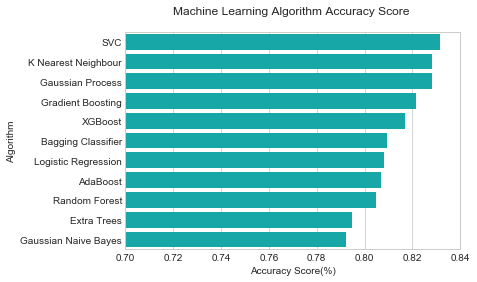

In [142]:
#plot results
sns.barplot(x='Score',y='Model',data = result_df,color='c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score(%)')
plt.ylabel('Algorithm')
plt.xlim(0.70,0.84)

In [143]:
def importance_plotting(data,x,y,palette,title):
    sns.set(style="whitegrid")
    ft=sns.PairGrid(data,y_vars=y,x_vars=x,size=5,aspect=1.5)
    ft.map(sns.stripplot,orient='h',palette=palette,edgecolor="black",size=15)
    for ax,title in zip(ft.axes.flat,titles):
        ax.set(title=title)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [144]:
fi = {'Features':train.columns.tolist(),'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False)

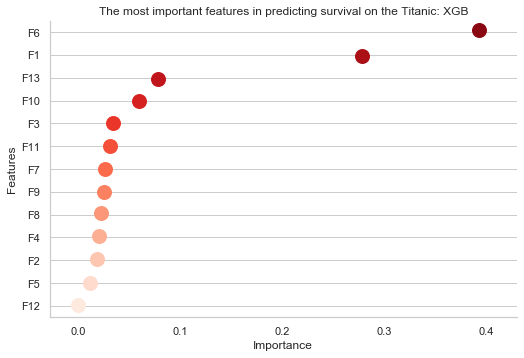

In [145]:
titles = ['The most important features in predicting survival on the Titanic: XGB']

importance_plotting(importance,'Importance','Features','Reds_r',titles)

In [146]:
#Logistic regression coefficients Feature importance
fi = {'Features':train.columns.tolist(),'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False)

In [147]:
importance.head(13)

,Features,Importance
5,F6,1.303138
11,F12,0.535165
0,F1,0.426720
10,F11,0.175797
7,F8,0.172825
2,F3,0.172812
6,F7,0.123664
4,F5,-0.029397
1,F2,-0.047947
8,F9,-0.090736


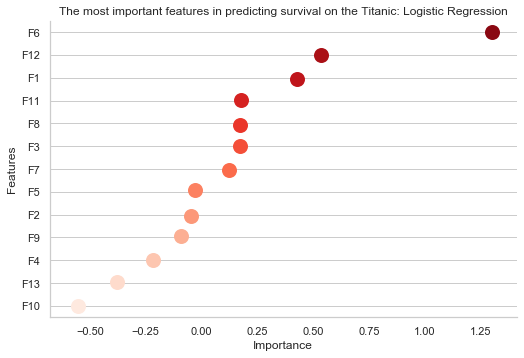

In [148]:
titles = ['The most important features in predicting survival on the Titanic: Logistic Regression']
importance_plotting(importance,'Importance','Features','Reds_r',titles)

In [149]:
gbc_imp = pd.DataFrame({'Feature':train.columns,'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns,'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns,'ran importance':ran.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns,'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns,'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns,'ada importance':ada.feature_importances_})

importances = gbc_imp.merge(xgb_imp,on='Feature').merge(ran_imp,on='Feature').merge(ext_imp,on='Feature').merge(ada_imp,on = 'Feature')
importances['Average']=importances.mean(axis=1)
importances = importances.sort_values(by='Average',ascending=False).reset_index(drop=True)
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,F6,0.478898,0.393446,0.091025,0.079977,0.08,0.224669
1,F8,0.114131,0.022765,0.202629,0.196549,0.30,0.167215
2,F9,0.074379,0.025049,0.172144,0.166742,0.26,0.139663
3,F1,0.162002,0.278483,0.091657,0.077336,0.06,0.133896
4,F10,0.058937,0.059394,0.040262,0.044037,0.08,0.056526
5,F7,0.038895,0.026120,0.061412,0.060276,0.08,0.053341
6,F13,0.038851,0.078302,0.042844,0.057659,0.04,0.051531
7,F5,0.013168,0.011187,0.091426,0.064062,0.02,0.039969
8,F3,0.002880,0.034293,0.062038,0.032462,0.02,0.030335
9,F2,0.003297,0.018514,0.039044,0.069435,0.02,0.030058


In [150]:
fi = {'Features':importances['Feature'],'Importance':importances['Average']}
importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False)

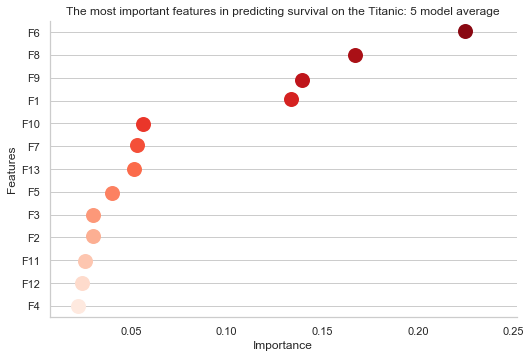

In [151]:
titles=['The most important features in predicting survival on the Titanic: 5 model average']
importance_plotting(importance,'Importance','Features','Reds_r',titles)

In [152]:
train = train.drop(['F12'],axis=1)
test = test.drop(['F12'],axis=1)

X_train = train
X_test = test

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

models = [ran,knn,log,xgb,gbc,svc,ext,ada,gnb,gpc,bag]
scores_v2=[]

#Fit & Cross Validate

for mod in models:
    mod.fit(X_train,y_train)
    acc = cross_val_score(mod,X_train,y_train,scoring = "accuracy",cv=10)
    scores_v2.append(acc.mean())

In [154]:
results = pd.DataFrame({'Model':['Random Forest','K Nearest Neighbour','Logistic Regression','XGBoost','Gradient Boosting','SVC','Extra Trees','AdaBoost','Gaussian Naive Bayes','Gaussian Process','Bagging Classifier'],'Original Score':scores,'Score with feature selection': scores_v2})
result_df = results.sort_values(by='Score with feature selection',ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,SVC,0.831648,0.830537
1,K Nearest Neighbour,0.828277,0.828277
2,Gaussian Naive Bayes,0.792372,0.828277
3,Gaussian Process,0.828277,0.828277
4,Gradient Boosting,0.821536,0.822659
5,Logistic Regression,0.808102,0.820437
6,XGBoost,0.817041,0.817041
7,AdaBoost,0.807016,0.812609
8,Random Forest,0.804732,0.811423
9,Bagging Classifier,0.809176,0.803596


(0.75, 0.85)

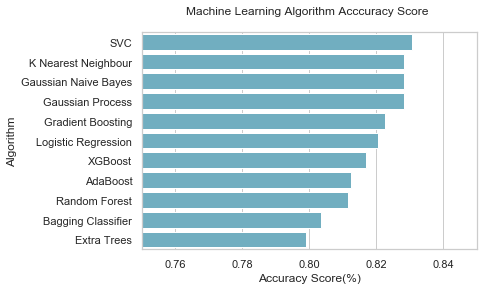

In [155]:
sns.barplot(x='Score with feature selection',y='Model',data=result_df,color='c')
plt.title('Machine Learning Algorithm Acccuracy Score \n')
plt.xlabel('Accuracy Score(%)')
plt.ylabel('Algorithm')
plt.xlim(0.75,0.85)

In [206]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [164]:
test.shape

(418, 1647)

In [165]:
X_test = test
X_train = train

In [166]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []

for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

In [168]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,Extra Trees,0.850737
1,Random Forest,0.849613
2,Bagging Classifier,0.840637
3,Logistic Regression,0.837266
4,XGBoost,0.837241
5,Gradient Boosting,0.830524
6,AdaBoost,0.822684
7,SVC,0.819326
8,K Nearest Neighbour,0.723933
9,Gaussian Process,0.699288


(0.5, 0.9)

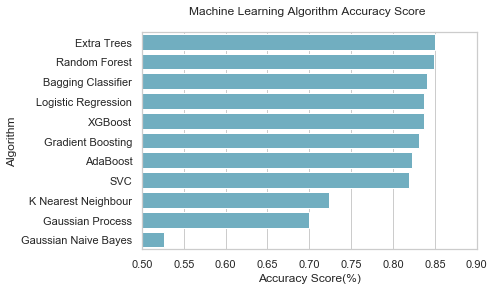

In [169]:
sns.barplot(x='Score',y='Model',data=result_df,color='c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score(%)')
plt.ylabel('Algorithm')
plt.xlim(0.50,0.90)

In [180]:
def importance_plotting(data,x,y,palette,title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data,y_vars=y,x_vars=x,size=5,aspect=1.5)
    ft.map(sns.stripplot,orient='h',palette=palette,edgecolor = "black",size=15)
    for ax, title in zip(ft.axes.flat,titles):
        ax.set(title=title)
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [183]:
fi = {'Features':train.columns.tolist(),'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False)

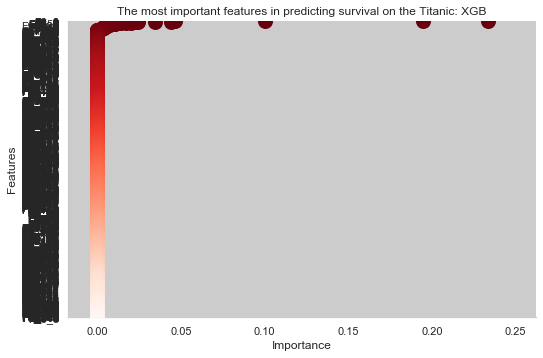

In [184]:
titles = ['The most important features in predicting survival on the Titanic: XGB']
importance_plotting(importance,'Importance','Features','Reds_r',titles)

In [187]:
#Feature Importance in Logistic Regression
fi = {'Features':train.columns.tolist(),'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi,index=None).sort_values('Importance',ascending=False)

importance[0:10]

,Features,Importance
38,F6_4,0.811614
1643,F12_3,0.691030
5,F1_5,0.439008
39,F6_5,0.409580
110,F8_59,0.397676
1644,F13_1,0.374917
228,F8_177,0.371955
295,F8_244,0.371955
400,F8_349,0.371371
1011,F9_107,0.362036


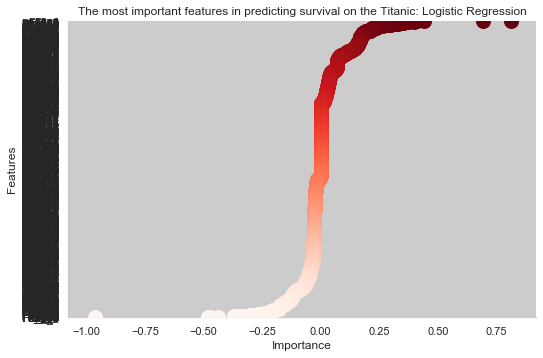

In [188]:
titles = ['The most important features in predicting survival on the Titanic: Logistic Regression']
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [191]:
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

importances = gbc_imp.merge(xgb_imp,on = 'Feature').merge(ran_imp,on='Feature').merge(ext_imp,on='Feature').merge(ada_imp,on='Feature')
importances['Average']=importances.mean(axis=1)
importances = importances.sort_values('Average',ascending=False).reset_index(drop=True)
importances[100:150]

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
100,F1_5,0.000000,0.000000,0.002783,0.004077,0.0,0.001372
101,F9_236,0.003241,0.000000,0.001717,0.001714,0.0,0.001334
102,F8_101,0.001920,0.000000,0.002384,0.002246,0.0,0.001310
103,F9_465,0.002126,0.000000,0.002212,0.002052,0.0,0.001278
104,F8_179,0.002554,0.000000,0.001634,0.002165,0.0,0.001271
105,F8_76,0.001731,0.000000,0.002458,0.002139,0.0,0.001266
106,F8_615,0.002342,0.000000,0.002205,0.001755,0.0,0.001260
107,F9_348,0.002502,0.000000,0.001982,0.001776,0.0,0.001252
108,F9_31,0.002580,0.000000,0.001730,0.001910,0.0,0.001244
109,F9_488,0.001915,0.000000,0.002261,0.002038,0.0,0.001243


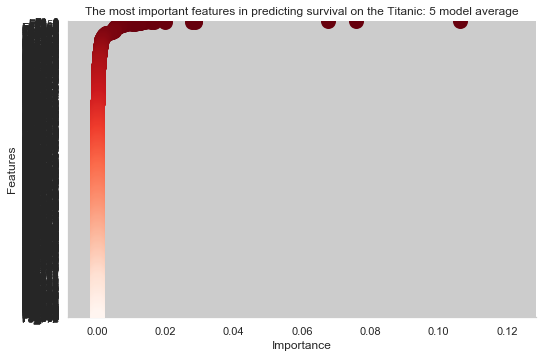

In [192]:
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)
titles = ['The most important features in predicting survival on the Titanic: 5 model average']
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)


In [193]:
importance1=importance[0:381]
importance1[371:381]

,Features,Importance
371,F8_208,0.000160
372,F8_38,0.000160
373,F8_398,0.000159
374,F8_26,0.000159
375,F8_591,0.000158
376,F9_480,0.000158
377,F9_467,0.000155
378,F9_189,0.000155
379,F8_168,0.000154
380,F8_553,0.000154


In [201]:
mylist = list(importance1['Features'])
mylist

['F1_0',
 'F3_0',
 'F6_2',
 'F13_1',
 'F2_0',
 'F5_0',
 'F6_4',
 'F4_5',
 'F12_1',
 'F5_5',
 'F4_4',
 'F9_58',
 'F1_6',
 'F12_2',
 'F7_2',
 'F2_8',
 'F4_2',
 'F4_0',
 'F4_6',
 'F11_0',
 'F3_1',
 'F11_1',
 'F1_7',
 'F13_2',
 'F8_409',
 'F7_9',
 'F13_3',
 'F8_256',
 'F9_70',
 'F7_4',
 'F10_4',
 'F3_7',
 'F3_5',
 'F8_24',
 'F6_5',
 'F8_157',
 'F9_413',
 'F9_169',
 'F8_583',
 'F9_8',
 'F8_613',
 'F9_254',
 'F9_209',
 'F8_360',
 'F9_156',
 'F9_65',
 'F8_39',
 'F9_138',
 'F8_298',
 'F8_104',
 'F8_433',
 'F9_204',
 'F8_152',
 'F5_6',
 'F8_127',
 'F8_291',
 'F8_229',
 'F8_568',
 'F8_62',
 'F8_243',
 'F5_2',
 'F5_3',
 'F3_8',
 'F7_3',
 'F9_1',
 'F10_6',
 'F10_1',
 'F7_6',
 'F7_5',
 'F2_1',
 'F10_2',
 'F7_8',
 'F7_7',
 'F10_3',
 'F9_29',
 'F10_5',
 'F9_201',
 'F6_1',
 'F9_2',
 'F8_244',
 'F8_177',
 'F8_115',
 'F9_12',
 'F8_350',
 'F9_49',
 'F9_0',
 'F8_191',
 'F9_39',
 'F8_436',
 'F5_4',
 'F8_233',
 'F7_1',
 'F9_192',
 'F10_7',
 'F9_16',
 'F11_2',
 'F9_107',
 'F8_13',
 'F9_295',
 'F1_2',
 'F1_5'

In [208]:
train1=pd.DataFrame()
test1=pd.DataFrame()

for i in mylist:
    train1[i] = train[i]
    test1[i] = test[i]
    
train1.head()

,F1_0,F3_0,F6_2,F13_1,F2_0,F5_0,F6_4,F4_5,F12_1,F5_5,...,F8_208,F8_38,F8_398,F8_26,F8_591,F9_480,F9_467,F9_189,F8_168,F8_553
0,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
train = train1
test = test1

X_train = train
X_test = test

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [210]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []

for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v2.append(acc.mean())

In [211]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,SVC,0.819326,0.915780
1,Gaussian Process,0.699288,0.865306
2,Extra Trees,0.850737,0.851860
3,Logistic Regression,0.837266,0.847366
4,Random Forest,0.849613,0.840637
5,XGBoost,0.837241,0.837241
6,Bagging Classifier,0.840637,0.836117
7,Gradient Boosting,0.830524,0.829426
8,AdaBoost,0.822684,0.820449
9,K Nearest Neighbour,0.723933,0.814844


(0.8, 0.92)

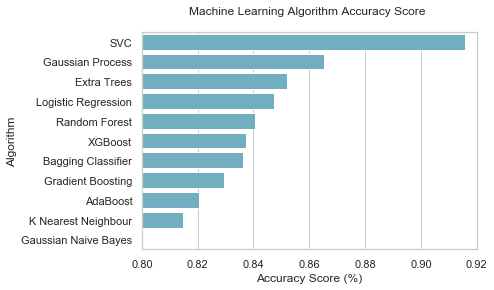

In [213]:
sns.barplot(x='Score with feature selection', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.80, 0.92)

In [221]:
#SVC

Cs = [0.001,0.01,0.1,1,5,10,20,50,100]

gammas = [0.001,0.01,0.1,1]

hyperparams={'C':Cs,'gamma':gammas}

gd=GridSearchCV(estimator=SVC(probability=True),param_grid=hyperparams,verbose=True,cv=5,scoring="accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  4.0min finished


0.9012303056933024
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [218]:
#Gradient Boosting Classifiers
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 29.2min finished


0.8495700207143306
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [223]:
#Logistic Regression

penalty=['l1','l2']
C = np.logspace(0,4,10)
hyperparams = {'penalty':penalty,'C':C}
gd=GridSearchCV(estimator=LogisticRegression(),param_grid=hyperparams,verbose=True,cv=5,scoring="accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8495825748540582
LogisticRegression(C=21.544346900318832, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.4s finished


In [224]:
#XGBoost Step1.

learning_rate=[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2]
n_estimators=[10,25,50,75,100,250,500,700,1000]
hyperparams={'learning_rate':learning_rate,'n_estimators':n_estimators}
gd=GridSearchCV(estimator=XGBClassifier(),param_grid=hyperparams,verbose=True,cv=5,scoring="accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 33.0min finished


0.830525390747599
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [226]:
#XGBoost Step2.

max_depth=[3,4,5,6,7,8,9,10]
min_child_weight=[1,2,3,4,5,6]
hyperparams={'max_depth':max_depth,'min_child_weight':min_child_weight}
gd=GridSearchCV(estimator=XGBClassifier(learning_rate=0.0001,n_estimators=10),param_grid=hyperparams,verbose=True,cv=5,scoring="accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.2min finished


0.8248948590797817
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [227]:
#XGB Step3.

gamma = [i*0.1 for i in range(0,5)]
hyperparams={'gamma':gamma}
gd=GridSearchCV(estimator=XGBClassifier(learning_rate=0.0001,n_estimators=10,max_depth=3,min_child_weight=1),param_grid=hyperparams,verbose=True,cv=5,scoring="accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.4s finished


0.7991400414286611
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [229]:
#XGB Step4.

subsample=[0.6,0.65,0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree=[0.6,0.65,0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
hyperparams = {'subsamples':subsample,'colsample_bytree':colsample_bytree}
gd=GridSearchCV(estimator=XGBClassifier(learning_rate=0.0001,n_estimator=10,max_depth=3,min_child_weight=1,gamma=0),param_grid=hyperparams,verbose=True,cv=5,scoring="accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 11.1min finished


0.8170547988199109
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimator=10,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, subsamples=0.6, verbosity=1)


In [235]:
#XGB Step5.
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3,min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.9),param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    5.5s finished


0.8081288054736049
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [238]:
#Gaussian Process
n_restarts_optimizer = [0,1,2,3]
max_iter_predict = [1,2,5,10,20,35,50,100]
warm_start = [True,False]

hyperparams = {'n_restarts_optimizer':n_restarts_optimizer,'max_iter_predict':max_iter_predict,'warm_start':warm_start}
gd = GridSearchCV(estimator = GaussianProcessClassifier(),param_grid=hyperparams,verbose=True,cv=5,scoring="accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  6.5min finished


0.8574665746029753
GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=1,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=True)


In [239]:
#AdaBoost

n_estimators = [10, 25, 50, 75, 100, 125, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}
gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  4.2min finished


0.8484589793484402
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.5,
                   n_estimators=150, random_state=None)


In [243]:
#KNN
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm=['auto']
weights = ['uniform','distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]
hyperparams = {'algorithm': algorithm, 'weights': weights,'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8507250015692674
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 11.3min finished


In [244]:
#Random Forest.
n_estimators = [10,25,50,75,100]
max_depth = [3,None]
max_features = [1,3,5,7]
min_samples_split = [2,4,6,8,10]
min_samples_leaf = [2,4,6,8,10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8148076078086749
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 11.6min finished


In [245]:
#Extra Trees
n_estimators=[10,25,50,75,100]
max_depth = [3,None]
max_features = [1,3,5,7]
min_samples_split = [2,4,6,8,10]
min_samples_leaf = [2,4,6,8,10]

hyperparams={'n_estimators':n_estimators,'max_depth':max_depth,'max_features':max_features,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
gd=GridSearchCV(estimator=ExtraTreesClassifier(),param_grid=hyperparams,verbose=True,cv=5,scoring="accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8237963718536188
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features=7,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  8.2min finished


In [246]:
#Bagging Classifier

n_estimators = [10,15,20,25,50,75,100,150]
max_samples = [1,2,3,5,7,10,15,20,25,30,50]
max_features = [1,3,5,7]

hyperparams = {'n_estimators':n_estimators,'max_samples':max_samples,'max_features':max_features}
gd = GridSearchCV(estimator=BaggingClassifier(),param_grid=hyperparams,verbose=True,cv=5,scoring = "accuracy")
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 352 candidates, totalling 1760 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7160379135019773
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=7, max_samples=15, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


[Parallel(n_jobs=1)]: Done 1760 out of 1760 | elapsed:  2.2min finished


In [247]:
ran = RandomForestClassifier(n_estimators=25,
                             max_depth=3, 
                             max_features=3,
                             min_samples_leaf=2, 
                             min_samples_split=8,  
                             random_state=1)

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=1, 
                           n_neighbors=5, 
                           weights='uniform')

log = LogisticRegression(C=2.7825594022071245,
                         penalty='l2')

xgb = XGBClassifier(learning_rate=0.0001, 
                    n_estimators=10,
                    random_state=1)

gbc = GradientBoostingClassifier(learning_rate=0.0005,
                                 n_estimators=1250,
                                 random_state=1)

svc = SVC(probability=True)

ext = ExtraTreesClassifier(max_depth=None, 
                           max_features=3,
                           min_samples_leaf=2, 
                           min_samples_split=8,
                           n_estimators=10,
                           random_state=1)

ada = AdaBoostClassifier(learning_rate=0.1, 
                         n_estimators=50,
                         random_state=1)

gpc = GaussianProcessClassifier()

bag = BaggingClassifier(random_state=1)

models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v3 = []

for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v3.append(acc.mean())

In [248]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2,
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection,Score with tuned parameters
0,SVC,0.819326,0.915780,0.915780
1,Gaussian Process,0.699288,0.865306,0.865306
2,Logistic Regression,0.837266,0.847366,0.847366
3,Bagging Classifier,0.840637,0.836117,0.836117
4,K Nearest Neighbour,0.723933,0.814844,0.814844
5,AdaBoost,0.822684,0.820449,0.814831
6,XGBoost,0.837241,0.837241,0.808115
7,Gradient Boosting,0.830524,0.829426,0.801398
8,Extra Trees,0.850737,0.851860,0.675643
9,Gaussian Naive Bayes,0.526380,0.670025,0.670025


(0.75, 0.86)

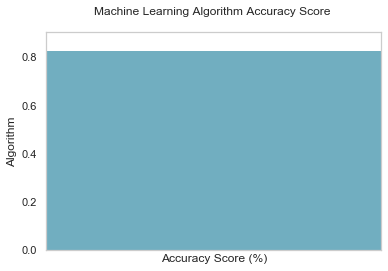

In [249]:
sns.barplot(x=None, y = None, data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.75, 0.86)

In [251]:
# Voting(Soft/Hard)
grid_hard = VotingClassifier(estimators = [('Random Forest',ran),('Logistic Regression',log),('XGBoost',xgb),('Gradient Boosting',gbc),('Extra Trees',ext),('AdaBoost',ada),('Gaussian Process',gpc),('SVC',svc),('K Nearest Neighbour',knn),('Bagging Classifier',bag)],voting='hard')
grid_hard_cv = model_selection.cross_validate(grid_hard,X_train,y_train,cv=10)
grid_hard.fit(X_train,y_train)
print("Hard voting on test set score mean:{:0.2f}".format(grid_hard_cv['test_score'].mean()*100))

Hard voting on test set score mean:84.06


In [252]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv = 10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))

Soft voting on test set score mean: 84.17


In [273]:
#final predictions
predictions = grid_soft.predict(X_test)
submission = pd.concat([pd.DataFrame(passId),pd.DataFrame(predictions)],axis='columns')
submission.columns = ["PassengerId","Survived"]
submission.to_csv('titanic_submission2.csv',header=True,index=False)

In [274]:
# final predictions2
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission3.csv', header = True, index = False)

In [276]:
submission.head(50)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
